In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [32]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [33]:
df.shape

(42000, 785)

In [34]:
df.sample(1)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40713,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
import matplotlib.pyplot as plt 


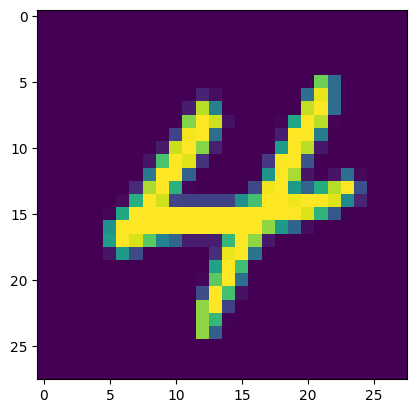

In [36]:
plt.imshow(df.iloc[1111,1:].values.reshape(28,28))

In [37]:
pd.Series(df.sample(1).values.flatten()).value_counts()

0      650
254     26
3        4
68       4
7        3
      ... 
20       1
242      1
117      1
177      1
85       1
Name: count, Length: 82, dtype: int64

In [38]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)

pred=knn.predict(xtest)



In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred)

0.9648809523809524

********Us****ing PCA****

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [47]:
xtrain1=scaler.fit_transform(xtrain)
xtest1=scaler.transform(xtest)

In [48]:
##pca 
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

In [49]:
xtrain_pca=pca.fit_transform(xtrain)
xtest_pca=pca.transform(xtest)


In [50]:
xtrain_pca.shape

(33600, 100)

In [51]:
knn_pca=KNeighborsClassifier()
knn_pca.fit(xtrain_pca,ytrain)
pred_pca=knn_pca.predict(xtest_pca)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,pred_pca)

0.969047619047619

In [53]:
##### visulaization
import plotly.express as px


In [54]:
pca=PCA(n_components=2)
xtrain_pca=pca.fit_transform(xtrain)
df_pca = pd.DataFrame({
    'PC1': xtrain_pca[:, 0],
    'PC2': xtrain_pca[:, 1],
    'Label': ytrain.values  
})

# Plot with Plotly Express
px.scatter(df_pca, x='PC1', y='PC2',color='Label')


In [55]:
pca=PCA(n_components=3)
xtrain_pca=pca.fit_transform(xtrain)
df_pca = pd.DataFrame({
    'PC1': xtrain_pca[:, 0],
    'PC2': xtrain_pca[:, 1],
    'PC3': xtrain_pca[:, 2],
    'Label': ytrain.values  
})

# Plot with Plotly Express
px.scatter_3d(df_pca, x='PC1', y='PC3',z='PC2',  color=ytrain.astype(str))


In [56]:
pca.explained_variance_
###### eigen values of pc1,pc2,pc3

array([335506.57620496, 244807.10427751, 212051.03448533])

In [57]:
### eigeen  vectors //// for top 3 eigen values
pca.components_

array([[ 5.84773722e-19, -4.62864665e-20,  6.00364440e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.54591945e-17, -2.62398819e-18,  6.81218132e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-5.24811559e-18, -1.36323409e-17,  2.57996970e-17, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00]])

In [58]:
pca.explained_variance_ratio_
### pc1,pc2,pc2 carrying 22% variance of data

array([0.09770722, 0.07129345, 0.06175413])

In [59]:
###optimum number od pc required

pca=PCA()
pca.fit(xtrain)



PCA()

In [60]:
s=0
cnt=0
for i in pca.explained_variance_ratio_:
    s+=i*100
    cnt=cnt+1
    if(s>=90):
        break

print(s,cnt)
    

90.07292041080687 87


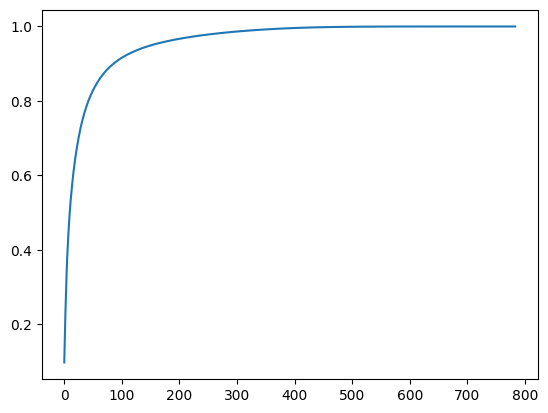

In [64]:
import matplotlib.pyplot as plt
plt.plot(np.cumsum((pca.explained_variance_ratio_)))